## New data Predictions

With Linear Regression.

In [67]:
# Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_date

# Set float display to avoid scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Wranings 
import warnings
warnings.filterwarnings('ignore')

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 69, Finished, Available, Finished)

### Read Data

In [68]:
# Read data 
new_df = pd.read_parquet("/lakehouse/default/Files/new/week_31_data.parquet")
new_df.head()

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 70, Finished, Available, Finished)

,hvfhs_license_num,pickup_datetime,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,cbd_congestion_fee,week_number
0,HV0003,2025-07-28 00:15:25,1.25,832,29.95,0.00,0.71,2.64,2.75,0.00,0.00,27.15,N,N,N,N,N,1.50,31
1,HV0003,2025-07-28 00:34:49,3.15,981,38.26,0.00,0.94,3.48,2.75,0.00,0.00,22.63,N,N,N,N,N,1.50,31
2,HV0003,2025-07-28 00:21:29,2.58,574,13.52,0.00,0.34,1.22,0.00,0.00,0.00,9.44,N,N,N,N,N,0.00,31
3,HV0003,2025-07-28 00:36:20,3.18,930,14.42,0.00,0.36,1.28,0.00,0.00,0.00,13.87,N,N,N,N,N,0.00,31
4,HV0003,2025-07-28 00:10:02,5.66,1740,51.58,0.00,1.29,4.58,2.75,0.00,0.00,26.48,N,N,N,N,N,0.00,31


In [69]:
# Shape 
print ("Shape of new data:" ,new_df.shape)

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 71, Finished, Available, Finished)

Shape of new data: (2547263, 19)


#### Data Quality

In [70]:
# Describe
new_df.describe()

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 72, Finished, Available, Finished)

,pickup_datetime,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,cbd_congestion_fee,week_number
count,2547263,2547263.00,2547263.00,2547263.00,2547263.00,2547263.00,2547263.00,2547263.00,2547263.00,2547263.00,2547263.00,2547263.00,2547263.00
mean,2025-07-30 03:28:43.935421952,4.97,1217.44,27.66,1.08,0.69,2.30,1.01,0.23,1.31,21.13,0.53,31.00
min,2025-07-28 00:00:00,0.00,1.00,-28.18,0.00,0.00,0.00,0.00,0.00,0.00,-4.68,0.00,31.00
25%,2025-07-29 05:56:52.500000,1.50,591.00,12.11,0.00,0.29,1.00,0.00,0.00,0.00,9.04,0.00,31.00
50%,2025-07-30 06:17:32,2.91,975.00,19.36,0.00,0.47,1.62,0.00,0.00,0.00,15.56,0.00,31.00
75%,2025-07-31 04:20:09,6.21,1568.00,33.04,0.00,0.82,2.82,2.75,0.00,0.00,26.73,1.50,31.00
max,2025-07-31 23:59:59,286.17,27572.00,1250.43,62.55,31.22,88.30,5.50,7.25,197.17,918.68,3.00,31.00
std,NaN,6.02,912.55,26.89,3.55,0.70,2.18,1.32,0.72,3.86,19.23,0.72,0.00


In [71]:
# Filter out 0, negative driver pay
new_df = new_df[new_df['driver_pay'] > 0]

# Filter out 0, negative base passenger fare
new_df = new_df[new_df['base_passenger_fare'] > 0]

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 73, Finished, Available, Finished)

In [72]:
# Nulls? 
new_df.isna().sum()

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 74, Finished, Available, Finished)

hvfhs_license_num       0
pickup_datetime         0
trip_miles              0
trip_time               0
base_passenger_fare     0
tolls                   0
bcf                     0
sales_tax               0
congestion_surcharge    0
airport_fee             0
tips                    0
driver_pay              0
shared_request_flag     0
shared_match_flag       0
access_a_ride_flag      0
wav_request_flag        0
wav_match_flag          0
cbd_congestion_fee      0
week_number             0
dtype: int64

In [73]:
# Info 
new_df.info()

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 75, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Index: 2546015 entries, 0 to 2547262
Data columns (total 19 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   pickup_datetime       datetime64[ns]
 2   trip_miles            float64       
 3   trip_time             int64         
 4   base_passenger_fare   float64       
 5   tolls                 float64       
 6   bcf                   float64       
 7   sales_tax             float64       
 8   congestion_surcharge  float64       
 9   airport_fee           float64       
 10  tips                  float64       
 11  driver_pay            float64       
 12  shared_request_flag   object        
 13  shared_match_flag     object        
 14  access_a_ride_flag    object        
 15  wav_request_flag      object        
 16  wav_match_flag        object        
 17  cbd_congestion_fee    float64       
 18  week_number           UInt32        
dtypes: UI

In [74]:
new_df.select_dtypes(['float64', 'int64']).describe()

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 76, Finished, Available, Finished)

,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,cbd_congestion_fee
count,2546015.00,2546015.00,2546015.00,2546015.00,2546015.00,2546015.00,2546015.00,2546015.00,2546015.00,2546015.00,2546015.00
mean,4.97,1217.74,27.67,1.08,0.69,2.30,1.01,0.23,1.31,21.14,0.53
std,6.03,912.49,26.90,3.55,0.70,2.18,1.32,0.72,3.86,19.23,0.72
min,0.00,1.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00
25%,1.50,592.00,12.11,0.00,0.29,1.00,0.00,0.00,0.00,9.05,0.00
50%,2.91,975.00,19.37,0.00,0.47,1.62,0.00,0.00,0.00,15.57,0.00
75%,6.21,1568.00,33.05,0.00,0.82,2.82,2.75,0.00,0.00,26.74,1.50
max,286.17,27572.00,1250.43,62.55,31.22,88.30,5.50,7.25,197.17,918.68,3.00


In [75]:
# Negative fares 


StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 77, Finished, Available, Finished)

In [76]:
# Shape 
print("Shape of new_df:" ,new_df.shape)

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 78, Finished, Available, Finished)

Shape of new_df: (2546015, 19)


### Derived Features

In [77]:
# Time-based features
new_df['pickup_hour'] = new_df['pickup_datetime'].dt.hour
new_df['pickup_dayofweek'] = new_df['pickup_datetime'].dt.dayofweek
new_df['is_weekend'] = new_df['pickup_dayofweek'].isin([5, 6]).astype(int)
new_df['time_of_day'] = pd.cut(new_df['pickup_hour'], bins=[0,6,12,18,24], 
        labels=['Night','Morning','Afternoon','Evening'], right=False)

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 79, Finished, Available, Finished)

In [78]:
# Columns 
new_df.columns

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 80, Finished, Available, Finished)

Index(['hvfhs_license_num', 'pickup_datetime', 'trip_miles', 'trip_time',
       'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'cbd_congestion_fee',
       'week_number', 'pickup_hour', 'pickup_dayofweek', 'is_weekend',
       'time_of_day'],
      dtype='object')

In [79]:
# Shape 
new_df.shape

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 81, Finished, Available, Finished)

(2546015, 23)

### 1/0 encoding 
for flag columns

In [80]:
# Set columns
columns_for_mapping = ['shared_request_flag', 'shared_match_flag', 'access_a_ride_flag', 
                        'wav_request_flag', 'wav_match_flag']

# Mapping features with Y/N to 1/0
mapping = {'Y': 1, 'N': 0}

# Loop through columns, map to new values from dic
for col in columns_for_mapping: 
    new_df[col] = new_df[col].map(mapping)

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 82, Finished, Available, Finished)

In [81]:
# Inspect rows 
display(new_df)

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 83, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 7c474675-fec4-4521-b70a-34123a18ab60)

### Feature Engineering

In [82]:
# new df
new_df1 = new_df.copy()

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 84, Finished, Available, Finished)

#### Feature Selection

In [83]:
# Columns 
new_df1.columns

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 85, Finished, Available, Finished)

Index(['hvfhs_license_num', 'pickup_datetime', 'trip_miles', 'trip_time',
       'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'cbd_congestion_fee',
       'week_number', 'pickup_hour', 'pickup_dayofweek', 'is_weekend',
       'time_of_day'],
      dtype='object')

In [84]:
# Drop features 
new_df1.drop(['pickup_datetime', 'trip_miles', 'bcf', 'base_passenger_fare',
        'bcf', 'sales_tax', 'shared_request_flag', 'wav_request_flag', 
        'week_number', 'cbd_congestion_fee', 'pickup_dayofweek', 
        'pickup_hour'], axis=1, inplace=True)

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 86, Finished, Available, Finished)

In [85]:
# Info 
new_df1.info()

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 87, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Index: 2546015 entries, 0 to 2547262
Data columns (total 12 columns):
 #   Column                Dtype   
---  ------                -----   
 0   hvfhs_license_num     object  
 1   trip_time             int64   
 2   tolls                 float64 
 3   congestion_surcharge  float64 
 4   airport_fee           float64 
 5   tips                  float64 
 6   driver_pay            float64 
 7   shared_match_flag     int64   
 8   access_a_ride_flag    int64   
 9   wav_match_flag        int64   
 10  is_weekend            int64   
 11  time_of_day           category
dtypes: category(1), float64(5), int64(5), object(1)
memory usage: 235.5+ MB


In [86]:
# Transform trip_time to float64 
new_df1['trip_time'] = new_df1['trip_time'].astype('float64')

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 88, Finished, Available, Finished)

In [87]:
# Validate trip_time
new_df1.dtypes

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 89, Finished, Available, Finished)

hvfhs_license_num         object
trip_time                float64
tolls                    float64
congestion_surcharge     float64
airport_fee              float64
tips                     float64
driver_pay               float64
shared_match_flag          int64
access_a_ride_flag         int64
wav_match_flag             int64
is_weekend                 int64
time_of_day             category
dtype: object

In [88]:
# View 
display(new_df1)

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 90, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, c16bf308-7eb8-4a82-abf0-e1944ddcd7cd)

#### Log-Transform 
Features

In [89]:
# New df
new_df2 = new_df1.copy()

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 91, Finished, Available, Finished)

In [90]:
# Shape 
new_df2.shape

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 92, Finished, Available, Finished)

(2546015, 12)

In [91]:
# Set continuous features 
continuous_features = new_df2.select_dtypes('float64').columns

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 93, Finished, Available, Finished)

In [92]:
# log1p transformation of continuous features
new_df2[continuous_features] = new_df2[continuous_features].apply(np.log1p)
print("Log transformation applied to columns:")
print(continuous_features)

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 94, Finished, Available, Finished)

Log transformation applied to columns:
Index(['trip_time', 'tolls', 'congestion_surcharge', 'airport_fee', 'tips',
       'driver_pay'],
      dtype='object')


In [93]:
# View df 
display(new_df2)

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 95, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 3ba78668-b60c-4719-ae38-9d8dce05b5ed)

#### Standard Scaler
for features only

In [94]:
# Copy df 
new_df3 = new_df2.copy()

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 96, Finished, Available, Finished)

In [95]:
# Shape 
new_df3.shape

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 97, Finished, Available, Finished)

(2546015, 12)

In [96]:
continuous_features

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 98, Finished, Available, Finished)

Index(['trip_time', 'tolls', 'congestion_surcharge', 'airport_fee', 'tips',
       'driver_pay'],
      dtype='object')

In [97]:
type(continuous_features)

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 99, Finished, Available, Finished)

pandas.core.indexes.base.Index

In [98]:
# Set features for scaling 
scaling_features = continuous_features.drop('driver_pay')
print ("continuous features:" ,continuous_features)
print ("scaling features:" ,scaling_features)

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 100, Finished, Available, Finished)

continuous features: Index(['trip_time', 'tolls', 'congestion_surcharge', 'airport_fee', 'tips',
       'driver_pay'],
      dtype='object')
scaling features: Index(['trip_time', 'tolls', 'congestion_surcharge', 'airport_fee', 'tips'], dtype='object')


In [99]:
# Initialize Scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform continuous features 
new_df3[scaling_features] = scaler.fit_transform(new_df3[scaling_features]) 

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 101, Finished, Available, Finished)

In [100]:
# Verify scaled features 
new_df3[continuous_features].describe()

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 102, Finished, Available, Finished)

,trip_time,tolls,congestion_surcharge,airport_fee,tips,driver_pay
count,2546015.00,2546015.00,2546015.00,2546015.00,2546015.00,2546015.00
mean,0.00,0.00,0.00,-0.00,0.00,2.84
std,1.00,1.00,1.00,1.00,1.00,0.70
min,-8.83,-0.35,-0.77,-0.31,-0.47,0.01
25%,-0.69,-0.35,-0.77,-0.31,-0.47,2.31
50%,0.02,-0.35,-0.77,-0.31,-0.47,2.81
75%,0.70,-0.35,1.31,-0.31,-0.47,3.32
max,4.80,5.36,2.18,5.55,6.39,6.82


**Note:** Driver pay is not part of Standard Scaling

#### Capping Outliers

In [101]:
# Winsorize and cap-off extreme values 
from scipy.stats.mstats import winsorize

# Copy df3
new_df3_winsorized = new_df3.copy()

# Winsorize all numeric columns at 1st and 99th percentiles
for col in new_df3_winsorized[continuous_features].columns:
    lower = new_df3_winsorized[col].quantile(0.01)
    upper = new_df3_winsorized[col].quantile(0.99)
    new_df3_winsorized[col] = new_df3_winsorized[col].clip(lower, upper)

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 103, Finished, Available, Finished)

In [102]:
# Shape 
new_df3_winsorized.shape

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 104, Finished, Available, Finished)

(2546015, 12)

In [103]:
# Describe 
new_df3_winsorized[continuous_features].describe()

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 105, Finished, Available, Finished)

,trip_time,tolls,congestion_surcharge,airport_fee,tips,driver_pay
count,2546015.00,2546015.00,2546015.00,2546015.00,2546015.00,2546015.00
mean,0.00,-0.00,-0.00,-0.00,-0.00,2.84
std,0.98,0.99,1.00,1.00,0.98,0.69
min,-2.32,-0.35,-0.77,-0.31,-0.47,1.61
25%,-0.69,-0.35,-0.77,-0.31,-0.47,2.31
50%,0.02,-0.35,-0.77,-0.31,-0.47,2.81
75%,0.70,-0.35,1.31,-0.31,-0.47,3.32
max,2.19,3.63,1.31,3.17,3.39,4.54


StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 106, Finished, Available, Finished)

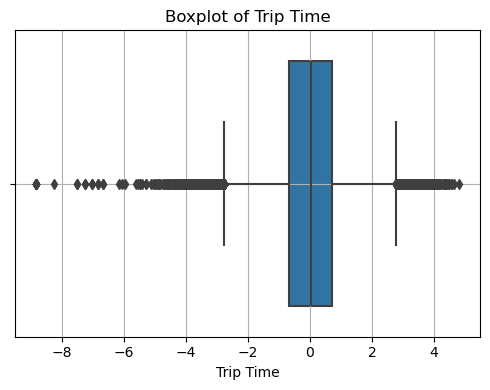

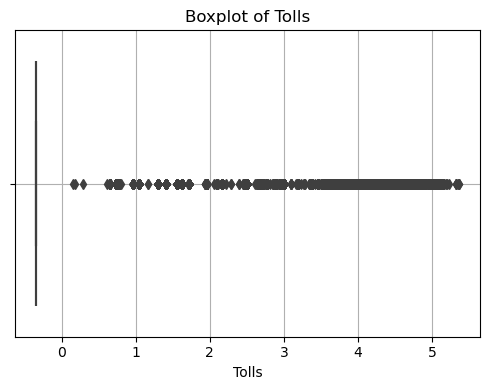

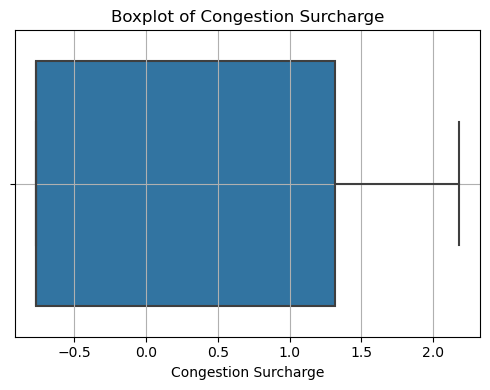

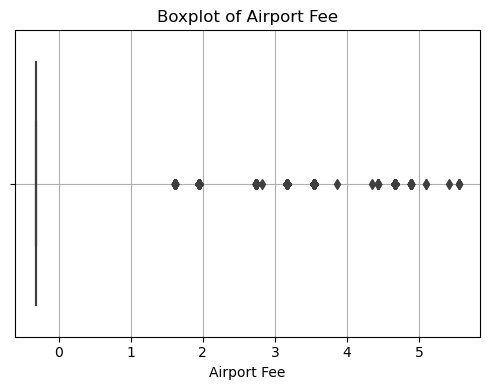

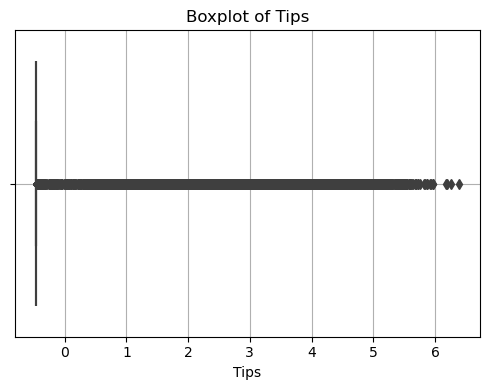

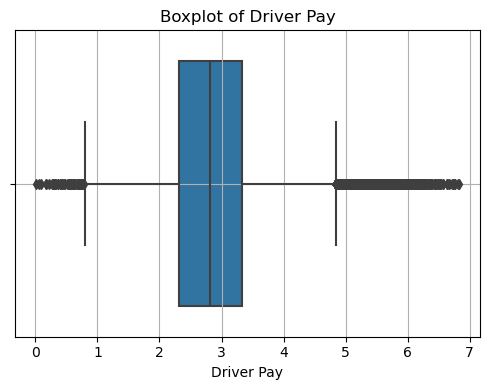

In [104]:
# Boxplots after feature transformations
for feature in continuous_features:
    plt.figure(figsize=(5, 4)) # new figure for each plot
    
    # boxplots 
    sns.boxplot(x=new_df3[feature])
    
    plt.title(f'Boxplot of {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.grid(True)
    plt.tight_layout()

#### 1-hot encoding

In [105]:
# Copy 
new_df4 = new_df3_winsorized.copy()

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 107, Finished, Available, Finished)

In [106]:
# Shape 
new_df4.shape

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 108, Finished, Available, Finished)

(2546015, 12)

In [107]:
# Info
new_df4.info()

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 109, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Index: 2546015 entries, 0 to 2547262
Data columns (total 12 columns):
 #   Column                Dtype   
---  ------                -----   
 0   hvfhs_license_num     object  
 1   trip_time             float64 
 2   tolls                 float64 
 3   congestion_surcharge  float64 
 4   airport_fee           float64 
 5   tips                  float64 
 6   driver_pay            float64 
 7   shared_match_flag     int64   
 8   access_a_ride_flag    int64   
 9   wav_match_flag        int64   
 10  is_weekend            int64   
 11  time_of_day           category
dtypes: category(1), float64(6), int64(4), object(1)
memory usage: 235.5+ MB


In [108]:
# Set categorical columns 
categorical_columns = ['hvfhs_license_num', 'shared_match_flag', 'access_a_ride_flag',
                        'wav_match_flag', 'is_weekend', 'time_of_day']
categorical_columns                    

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 110, Finished, Available, Finished)

['hvfhs_license_num',
 'shared_match_flag',
 'access_a_ride_flag',
 'wav_match_flag',
 'is_weekend',
 'time_of_day']

In [109]:
# Libraries for encoder and joblib
from sklearn.preprocessing import OneHotEncoder
import joblib

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 111, Finished, Available, Finished)

##### Loading saved encoder 
from lakehouse/models folder 

In [110]:
# Instantiate and Load the encoder from the file
import joblib
loaded_encoder = joblib.load('/lakehouse/default/Files/models/one_hot_encoder.joblib')

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 112, Finished, Available, Finished)

##### Fitting encoder to data

In [111]:
# Fitting new_df4 to saved encoder
new_df4_encoded = loaded_encoder.fit_transform(new_df4[categorical_columns])

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 113, Finished, Available, Finished)

In [112]:
# encoded data 
new_df4_encoded

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 114, Finished, Available, Finished)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [113]:
# New column names from the encoder
feature_names = loaded_encoder.get_feature_names_out(categorical_columns)

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 115, Finished, Available, Finished)

In [114]:
# New DataFrame with the encoded data, new column names
encoded_df = pd.DataFrame(new_df4_encoded, columns=feature_names, dtype=int)

# View the new DataFrame
print("DataFrame after One-Hot Encoding:")
display(encoded_df)

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 116, Finished, Available, Finished)

DataFrame after One-Hot Encoding:


SynapseWidget(Synapse.DataFrame, 6eba6b42-4c69-4d44-bcf2-29b784e0a505)

In [115]:
# Replace categorical columns with 1-hot encoded columns
new_df4.drop(columns=categorical_columns, inplace=True)

# new df 
new_df5 = pd.concat([ new_df4.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
new_df5

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 117, Finished, Available, Finished)

,trip_time,tolls,congestion_surcharge,airport_fee,tips,driver_pay,hvfhs_license_num_HV0005,shared_match_flag_1,access_a_ride_flag_1,wav_match_flag_1,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,-0.20,-0.35,1.31,-0.31,-0.47,3.34,0,0,0,0,0,0,1
1,0.03,-0.35,1.31,-0.31,-0.47,3.16,0,0,0,0,0,0,1
2,-0.73,-0.35,-0.77,-0.31,-0.47,2.35,0,0,0,0,0,0,1
3,-0.04,-0.35,-0.77,-0.31,-0.47,2.70,0,0,0,0,0,0,1
4,0.85,-0.35,1.31,-0.31,-0.47,3.31,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546010,1.36,3.55,-0.77,-0.31,-0.47,4.54,0,0,0,0,1,0,0
2546011,1.91,3.36,1.31,-0.31,-0.47,4.33,0,0,0,0,1,0,0
2546012,1.62,2.77,-0.77,3.17,-0.47,4.43,0,0,0,0,1,0,0
2546013,-0.34,-0.35,0.11,-0.31,-0.47,2.28,0,1,0,0,1,0,0


In [116]:
display(new_df5)

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 118, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, bb411803-4375-40fb-bc49-4668ff451c55)

### Predictions

In [124]:
# Adding is_weekend? 
new_df5['is_weekend_1'] = 0                     # Only run this line if the week has no weekend data.

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 126, Finished, Available, Finished)

In [134]:
# Reset column order 
col_order = ['trip_time', 'tolls', 'congestion_surcharge', 'airport_fee', 'tips',
       'driver_pay', 'hvfhs_license_num_HV0005', 'shared_match_flag_1',
       'access_a_ride_flag_1', 'wav_match_flag_1', 'is_weekend_1', 
       'time_of_day_Evening', 'time_of_day_Morning', 'time_of_day_Night']

new_df5 = new_df5.reindex(columns=col_order)            # Reindex, run only if data has no weekend

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 136, Finished, Available, Finished)

In [135]:
new_df5.head()

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 137, Finished, Available, Finished)

,trip_time,tolls,congestion_surcharge,airport_fee,tips,driver_pay,hvfhs_license_num_HV0005,shared_match_flag_1,access_a_ride_flag_1,wav_match_flag_1,is_weekend_1,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,-0.20,-0.35,1.31,-0.31,-0.47,3.34,0,0,0,0,0,0,0,1
1,0.03,-0.35,1.31,-0.31,-0.47,3.16,0,0,0,0,0,0,0,1
2,-0.73,-0.35,-0.77,-0.31,-0.47,2.35,0,0,0,0,0,0,0,1
3,-0.04,-0.35,-0.77,-0.31,-0.47,2.70,0,0,0,0,0,0,0,1
4,0.85,-0.35,1.31,-0.31,-0.47,3.31,0,0,0,0,0,0,0,1


In [136]:
# Shape 
new_df5.shape

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 138, Finished, Available, Finished)

(2546015, 14)

In [137]:
# Columns 
new_df5.columns

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 139, Finished, Available, Finished)

Index(['trip_time', 'tolls', 'congestion_surcharge', 'airport_fee', 'tips',
       'driver_pay', 'hvfhs_license_num_HV0005', 'shared_match_flag_1',
       'access_a_ride_flag_1', 'wav_match_flag_1', 'is_weekend_1',
       'time_of_day_Evening', 'time_of_day_Morning', 'time_of_day_Night'],
      dtype='object')

#### X for features, y for target variable

In [138]:
# Target 
y = new_df5['driver_pay']

# Features (change per modelling demands)
X = new_df5.drop('driver_pay', axis=1)

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 140, Finished, Available, Finished)

In [139]:
X.head()

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 141, Finished, Available, Finished)

,trip_time,tolls,congestion_surcharge,airport_fee,tips,hvfhs_license_num_HV0005,shared_match_flag_1,access_a_ride_flag_1,wav_match_flag_1,is_weekend_1,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
0,-0.20,-0.35,1.31,-0.31,-0.47,0,0,0,0,0,0,0,1
1,0.03,-0.35,1.31,-0.31,-0.47,0,0,0,0,0,0,0,1
2,-0.73,-0.35,-0.77,-0.31,-0.47,0,0,0,0,0,0,0,1
3,-0.04,-0.35,-0.77,-0.31,-0.47,0,0,0,0,0,0,0,1
4,0.85,-0.35,1.31,-0.31,-0.47,0,0,0,0,0,0,0,1


In [140]:
# Check nan's
y[y.isna()]

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 142, Finished, Available, Finished)

Series([], Name: driver_pay, dtype: float64)

#### Loading saved LR Model
The saved model is LR from sklearn

In [141]:
import joblib

# Path to .pkl file
model_path = "/lakehouse/default/Files/models/lr_sklearn.pkl"

try:
    # Use joblib.load() to load the model
    loaded_model = joblib.load(model_path)
    print("Model loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file was not found at {model_path}")
    # Handle the error
except Exception as e:
    print(f"An error occurred: {e}")

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 143, Finished, Available, Finished)

Model loaded successfully!


In [142]:
# Predictions on new data 
y_pred = loaded_model.predict(X)

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 144, Finished, Available, Finished)

#### Predictions Accuracy

In [144]:
# Accuracy 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)
# Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R²)
r2 = r2_score(y, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 146, Finished, Available, Finished)

Mean Absolute Error (MAE): 0.16
Mean Squared Error (MSE): 0.05
Root Mean Squared Error (RMSE): 0.21
R-squared (R²): 0.90


In [145]:
# Shape 
print ("The shape of predictions:", y_pred.shape)

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 147, Finished, Available, Finished)

The shape of predictions: (2546015,)


In [146]:
# df of X,y,predictions
pd.concat([X, y, pd.DataFrame(y_pred, columns=['fares_pred'], index=X.index)], axis=1)

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 148, Finished, Available, Finished)

,trip_time,tolls,congestion_surcharge,airport_fee,tips,hvfhs_license_num_HV0005,shared_match_flag_1,access_a_ride_flag_1,wav_match_flag_1,is_weekend_1,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,driver_pay,fares_pred
0,-0.20,-0.35,1.31,-0.31,-0.47,0,0,0,0,0,0,0,1,3.34,2.83
1,0.03,-0.35,1.31,-0.31,-0.47,0,0,0,0,0,0,0,1,3.16,2.97
2,-0.73,-0.35,-0.77,-0.31,-0.47,0,0,0,0,0,0,0,1,2.35,2.48
3,-0.04,-0.35,-0.77,-0.31,-0.47,0,0,0,0,0,0,0,1,2.70,2.89
4,0.85,-0.35,1.31,-0.31,-0.47,0,0,0,0,0,0,0,1,3.31,3.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546010,1.36,3.55,-0.77,-0.31,-0.47,0,0,0,0,0,1,0,0,4.54,3.88
2546011,1.91,3.36,1.31,-0.31,-0.47,0,0,0,0,0,1,0,0,4.33,4.23
2546012,1.62,2.77,-0.77,3.17,-0.47,0,0,0,0,0,1,0,0,4.43,4.15
2546013,-0.34,-0.35,0.11,-0.31,-0.47,0,1,0,0,0,1,0,0,2.28,2.25


In [147]:
# Get actuals, predictions to original scale (before log transformation)
predictions_exp = np.expm1(y_pred)            # log(1+x)
actuals_exp = np.expm1(y)

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 149, Finished, Available, Finished)

In [148]:
# reults df
results_df = pd.DataFrame({
    "actual_pay": actuals_exp,
    "predicted_pay": pd.Series(predictions_exp, index=actuals_exp.index),
   })
results_df

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 150, Finished, Available, Finished)

,actual_pay,predicted_pay
0,27.15,15.86
1,22.63,18.41
2,9.44,10.93
3,13.87,17.02
4,26.48,30.69
...,...,...
2546010,92.24,47.54
2546011,74.90,67.67
2546012,82.57,62.42
2546013,8.73,8.52


In [149]:
# Nulls?
results_df.isnull().sum()

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 151, Finished, Available, Finished)

actual_pay       0
predicted_pay    0
dtype: int64

In [150]:
# Shape 
print ("Shape of results data:" , results_df.shape)
print ("Shape of new_df:", new_df.shape)

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 152, Finished, Available, Finished)

Shape of results data: (2546015, 2)
Shape of new_df: (2546015, 23)


In [151]:
# Final df - train, test, predictions
final_df = pd.concat([new_df.reset_index(drop=True), results_df.reset_index(drop=True)], axis=1)
display(final_df)

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 153, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, e5f79ff8-b828-454e-8056-93dd7becc300)

In [152]:
# actual df vs. results df
pd.concat ([new_df['driver_pay'].reset_index(drop=True), 
            results_df.reset_index(drop=True)], axis=1)

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 154, Finished, Available, Finished)

,driver_pay,actual_pay,predicted_pay
0,27.15,27.15,15.86
1,22.63,22.63,18.41
2,9.44,9.44,10.93
3,13.87,13.87,17.02
4,26.48,26.48,30.69
...,...,...,...
2546010,95.01,92.24,47.54
2546011,74.90,74.90,67.67
2546012,82.57,82.57,62.42
2546013,8.73,8.73,8.52


In [153]:
# Shape 
print ("Shape of new df:" , new_df.shape)
print ("Shape of results_df" , results_df.shape)

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 155, Finished, Available, Finished)

Shape of new df: (2546015, 23)
Shape of results_df (2546015, 2)


In [154]:
# Dtypes
final_df.dtypes

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 156, Finished, Available, Finished)

hvfhs_license_num               object
pickup_datetime         datetime64[ns]
trip_miles                     float64
trip_time                        int64
base_passenger_fare            float64
tolls                          float64
bcf                            float64
sales_tax                      float64
congestion_surcharge           float64
airport_fee                    float64
tips                           float64
driver_pay                     float64
shared_request_flag              int64
shared_match_flag                int64
access_a_ride_flag               int64
wav_request_flag                 int64
wav_match_flag                   int64
cbd_congestion_fee             float64
week_number                     UInt32
pickup_hour                      int32
pickup_dayofweek                 int32
is_weekend                       int64
time_of_day                   category
actual_pay                     float64
predicted_pay                  float64
dtype: object

In [155]:
# Fix week_number data type
final_df['week_number'] = final_df['week_number'].astype("float64")

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 157, Finished, Available, Finished)

In [156]:
# Re-check 
final_df.info()

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 158, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546015 entries, 0 to 2546014
Data columns (total 25 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   pickup_datetime       datetime64[ns]
 2   trip_miles            float64       
 3   trip_time             int64         
 4   base_passenger_fare   float64       
 5   tolls                 float64       
 6   bcf                   float64       
 7   sales_tax             float64       
 8   congestion_surcharge  float64       
 9   airport_fee           float64       
 10  tips                  float64       
 11  driver_pay            float64       
 12  shared_request_flag   int64         
 13  shared_match_flag     int64         
 14  access_a_ride_flag    int64         
 15  wav_request_flag      int64         
 16  wav_match_flag        int64         
 17  cbd_congestion_fee    float64       
 18  week_number           float64       
 19  

In [157]:
# Nulls?
final_df.isnull().sum()

StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 159, Finished, Available, Finished)

hvfhs_license_num       0
pickup_datetime         0
trip_miles              0
trip_time               0
base_passenger_fare     0
tolls                   0
bcf                     0
sales_tax               0
congestion_surcharge    0
airport_fee             0
tips                    0
driver_pay              0
shared_request_flag     0
shared_match_flag       0
access_a_ride_flag      0
wav_request_flag        0
wav_match_flag          0
cbd_congestion_fee      0
week_number             0
pickup_hour             0
pickup_dayofweek        0
is_weekend              0
time_of_day             0
actual_pay              0
predicted_pay           0
dtype: int64

#### Write back to Fabric lakehouse

In [71]:
# new spark df, write as delta to fabric table
spark_df = spark.createDataFrame(final_df)
spark_df.write.format("delta").mode("overwrite").option("overwriteSchema", 
                        "true").saveAsTable("final_df")

StatementMeta(, e71ba616-add7-45f3-a1f6-5cff36dc94ef, 73, Finished, Available, Finished)

In [158]:
# Append spark_df to existing table in fabric tables
spark_df = spark.createDataFrame(final_df)

spark_df.write.format("delta") \
    .mode("append") \
    .saveAsTable("final_df")


StatementMeta(, 47050221-2436-40a6-8f27-5eb525aa1fbb, 160, Finished, Available, Finished)